In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
df = pd.read_csv("auto.csv")

In [6]:
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [8]:
df.columns=headers

In [9]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Data Cleaning

In [14]:
df1=df.replace('?',np.NaN)
df= df1.dropna(subset=['price'], axis=0)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [15]:
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [18]:
missing_values=df.isnull()
missing_values.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
for column in df.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    

symboling
symboling
False    200
Name: count, dtype: int64
normalized-losses
normalized-losses
False    164
True      36
Name: count, dtype: int64
make
make
False    200
Name: count, dtype: int64
fuel-type
fuel-type
False    200
Name: count, dtype: int64
aspiration
aspiration
False    200
Name: count, dtype: int64
num-of-doors
num-of-doors
False    198
True       2
Name: count, dtype: int64
body-style
body-style
False    200
Name: count, dtype: int64
drive-wheels
drive-wheels
False    200
Name: count, dtype: int64
engine-location
engine-location
False    200
Name: count, dtype: int64
wheel-base
wheel-base
False    200
Name: count, dtype: int64
length
length
False    200
Name: count, dtype: int64
width
width
False    200
Name: count, dtype: int64
height
height
False    200
Name: count, dtype: int64
curb-weight
curb-weight
False    200
Name: count, dtype: int64
engine-type
engine-type
False    200
Name: count, dtype: int64
num-of-cylinders
num-of-cylinders
False    200
Name: count, dtype

In [24]:
loss_avg=df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses']= df['normalized-losses'].replace(np.nan, loss_avg)

In [25]:
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"]=df["bore"].replace(np.nan, avg_bore)

In [26]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke']=df['stroke'].replace(np.NAN, avg_stroke)

In [27]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower']=df['horsepower'].replace(np.nan, avg_horsepower)

In [28]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm']=df['peak-rpm'].replace(np.nan, avg_peakrpm)

In [30]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [31]:
df["num-of-doors"]=df["num-of-doors"].replace(np.nan, "four")

In [32]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [34]:
print(df.isnull())

     symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False              False  False      False       False         False   
1        False              False  False      False       False         False   
2        False              False  False      False       False         False   
3        False              False  False      False       False         False   
4        False              False  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
195      False              False  False      False       False         False   
196      False              False  False      False       False         False   
197      False              False  False      False       False         False   
198      False              False  False      False       False         False   
199      False              False  False      False       False         False   

     body-style  drive-whee

In [35]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [76]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[['horsepower']]= df[['horsepower']].astype("float")

In [77]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
asp_type_std            bool
asp_type_turbo          bool
dtype: object

In [40]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height']= df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


In [42]:
fuel_dummies= pd.get_dummies(df['fuel-type'])
fuel_dummies

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
195,False,True
196,False,True
197,False,True
198,True,False


In [47]:
pd.concat([df, fuel_dummies], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [48]:
dummies= pd.get_dummies(df['aspiration'])
dummies.rename(columns={'std':'asp_type_std', 'turbo':'asp_type_turbo'}, inplace=True)
df= pd.concat([df, dummies], axis=1)
df.drop("aspiration", axis = 1, inplace=True)  

# EDA

In [53]:
correlated= df[[" bore", "stroke", "compression-ratio","horsepower"]]
correlated.corr()


,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051087,0.002021,0.566736
stroke,-0.051087,1.000000,0.186761,0.100547
compression-ratio,0.002021,0.186761,1.000000,-0.214197
horsepower,0.566736,0.100547,-0.214197,1.000000


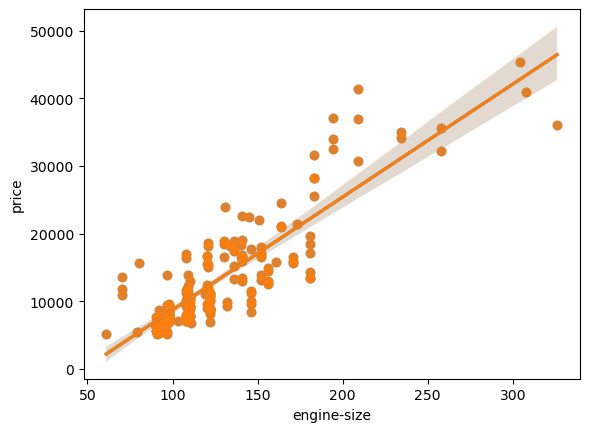

In [57]:

sns.regplot(x='engine-size', y= 'price', data= df)
plt.show()

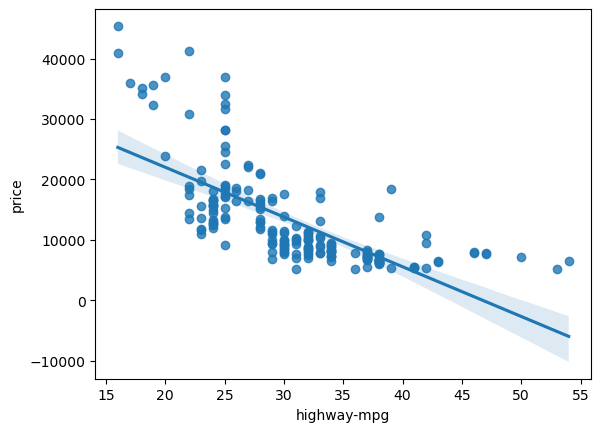

In [59]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.show()

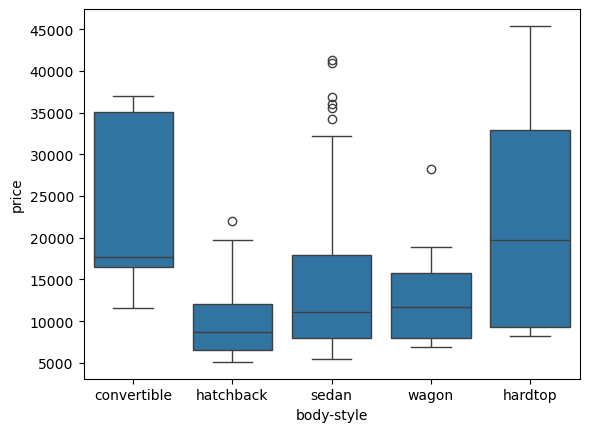

In [60]:
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

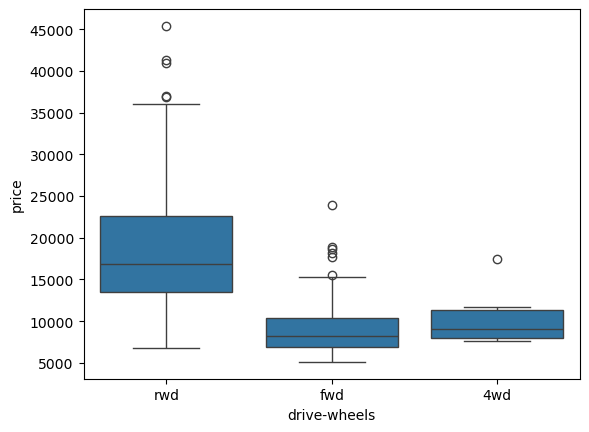

In [61]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

In [66]:
df_type=df[['drive-wheels', 'body-style','price']]
df_type_grouped=df_type.groupby(['drive-wheels','body-style'], as_index=False).agg({'price': 'mean'})
df_type_grouped

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [68]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.457019502050271e-20


In [73]:
df['horsepower'].dtype

dtype('O')

In [88]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809735739098524  with a P-value of P =  1.0089009233334117e-47


# Model

In [229]:
lm = LinearRegression()
lm

LinearRegression()

In [230]:
X = df[['highway-mpg']]
Y = df['price']

In [231]:
lm.fit(X,Y)

LinearRegression()

In [232]:
yhat=lm.predict(X)
yhat

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473, 17899.92620473, 17899.92620473, 22014.06836489,
       14608.61247661, 14608.61247661, 15431.44090864, 15431.44090864,
       17899.92620473, 20368.41150083, 20368.41150083, 22014.06836489,
       -5139.26989212,  3089.01442818,  3089.01442818,  4734.67129225,
        7203.15658834, 13785.78404458,  7203.15658834,  7203.15658834,
        7203.15658834, 13785.78404458, 13785.78404458, 18722.75463676,
       -5962.09832415,  7203.15658834,  3911.84286022, 10494.47031646,
       10494.47031646, 10494.47031646, 10494.47031646, 11317.29874849,
       11317.29874849, 11317.29874849, 11317.29874849, 15431.44090864,
       12962.95561255, 14608.61247661, 14608.61247661, 22836.89679692,
       22836.89679692, 24482.55366098, 12962.95561255,  7203.15658834,
        7203.15658834,  7203.15658834,  7203.15658834, 19545.5830688 ,
       19545.5830688 , 19545.5830688 , 19545.5830688 , 12140.12718052,
      

In [233]:
lm.intercept_

38470.63700549667

In [234]:
lm.coef_

array([-822.82843203])

In [235]:
x=df['highway-mpg']
total_price=38470.63 -822.82*x
total_price.index.name = "Predicted_price"
total_price

Predicted_price
0      16254.49
1      17077.31
2      13786.03
3      20368.59
4      17900.13
         ...   
195    15431.67
196    17900.13
197    19545.77
198    16254.49
199    17900.13
Name: highway-mpg, Length: 200, dtype: float64

In [236]:
comparison = pd.DataFrame({
    'Highway_mpg': df['highway-mpg'],
    'Actual_price': df['price'],
    'Predicted_price': total_price
})
comparison.index.name='Number'
print(comparison.head())


        Highway_mpg  Actual_price  Predicted_price
Number                                            
0                27       16500.0         16254.49
1                26       16500.0         17077.31
2                30       13950.0         13786.03
3                22       17450.0         20368.59
4                25       15250.0         17900.13


### Car Price Prediction based on Horsepower, curb weight, Engine size and Highway-mpg

In [237]:
XM=df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
YM=df['price']

In [238]:
lm1=LinearRegression()
lm1

LinearRegression()

In [239]:
lm1.fit(XM,YM)

LinearRegression()

In [240]:
predicted_price=lm1.predict(XM)
predicted_price


array([13700.99992459, 19056.32802863, 10622.86511077, 15522.45268614,
       13871.13688239, 15456.97098993, 15974.60230099, 17615.57305793,
       10724.58512979, 10724.58512979, 17806.00459674, 18064.82025227,
       19321.0986044 , 26972.54916158, 27678.4100403 , 28194.37009697,
         653.0321992 ,  5650.42663071,  5815.12750241,  5480.38776945,
        5372.00175605,  8743.0010928 ,  5800.22402247,  5903.75028469,
        5903.75028469,  9039.46266187, 11863.59038452, 18771.18406494,
        4810.03538761,  5695.52198018,  4007.85609566,  6120.40173782,
        6195.69356488,  6449.80348122,  6515.6838299 ,  9479.91517107,
        9729.31934822,  9799.90543609, 10119.89570112, 11180.83357059,
       10426.23594437,  9463.39583964, 12626.63375707, 34469.47864924,
       34469.47864924, 44001.8169782 ,  5266.46909107,  5566.42718091,
        5589.95587687,  5778.18544453,  5801.71414049,  7340.69501295,
        7340.69501295,  7364.22370891, 10542.54151403, 11015.60085331,
      

In [241]:
lm1.intercept_

-15807.30796515431

In [242]:
lm1.coef_

array([53.59649869,  4.70573919, 81.48768427, 36.12867113])

In [243]:
compare = pd.DataFrame({
    'Highway_mpg': df['highway-mpg'],
    'horsepower': df['horsepower'],
    'curb-weight': df['curb-weight'],
    'engine-size': df['engine-size'],
    'Actual_price': df['price'],
    'Predicted_price': predicted_price
})
compare.index.name='Number'
print(compare.head())

        Highway_mpg  horsepower  curb-weight  engine-size  Actual_price  \
Number                                                                    
0                27       111.0         2548          130       16500.0   
1                26       154.0         2823          152       16500.0   
2                30       102.0         2337          109       13950.0   
3                22       115.0         2824          136       17450.0   
4                25       110.0         2507          136       15250.0   

        Predicted_price  
Number                   
0          13700.999925  
1          19056.328029  
2          10622.865111  
3          15522.452686  
4          13871.136882  


In [244]:
import warnings
warnings.filterwarnings('ignore')


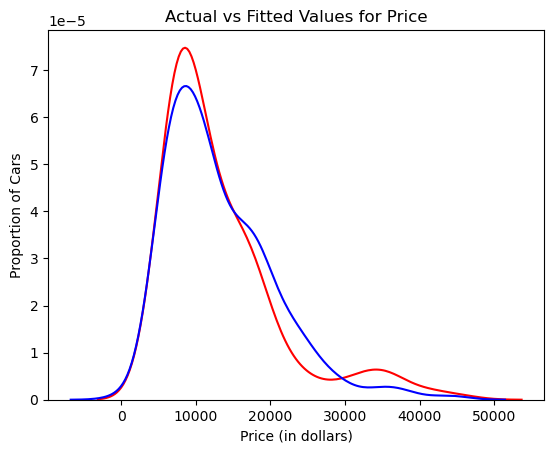

In [245]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predicted_price, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### Polynomial Regression might be a better option here as we are dealing with curves in the graph rather than straight lines.

In [246]:
xp = df[['highway-mpg']]
yp= df['price']


In [267]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(xp)

model = LinearRegression()
model.fit(x_poly, yp)

predicted = model.predict(x_poly)

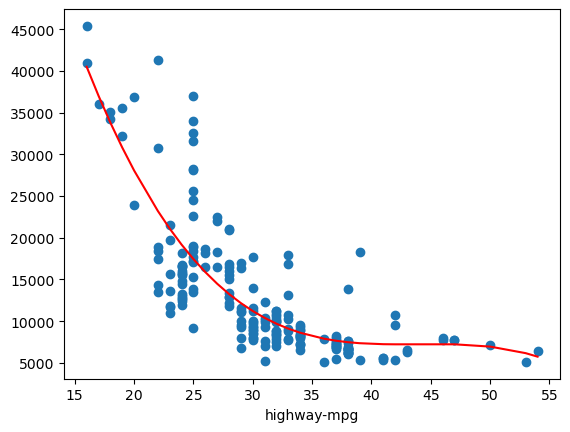

In [268]:
plt.scatter(xp, yp)
sort_axis = np.argsort(x.values.flatten())
plt.plot(x.values.flatten()[sort_axis], predicted[sort_axis], color='red')
plt.xlabel('highway-mpg')
plt.show()

### Car Price Prediction based on Horsepower, curb weight, Engine size and Highway-mpg

In [249]:
z= df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

In [250]:
input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [251]:
pipe=Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [252]:
z = z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [253]:
prediction=pipe.predict(z)
prediction[0:10]

array([13095.3683245 , 18224.95716349, 10388.16455605, 16123.27954832,
       13865.80444409, 15034.94646666, 15453.43579402, 17966.28679023,
       10507.59087372, 10507.59087372])

## Evaluating the best fitting model

In [254]:
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.49718675257265266


In [255]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31755395.41081296


In [256]:
lm1.fit(XM, YM)
print('The R-square is: ', lm1.score(XM, YM))

The R-square is:  0.8094176067158593


In [258]:
print('The mean square error of price using multiLinear Regression is: ', \
      mean_squared_error(df['price'], predicted_price))

The mean square error of price using multiLinear Regression is:  12036316.242744625


In [266]:

r2 = r2_score(yp, prediction)
mse = mean_squared_error(yp, prediction)

print("R² score:", r2)
print("Mean Squared Error:", mse)

R² score: 0.8463595428806852
Mean Squared Error: 9703231.750326673
